# Problem Statement

Real estate is a big industry and most often times multiple stakeholders are pondering about one thing - what's the best price to deal at. 

If you're a looking to purchase a house, you're probably wondering what would be the best price to buy a particular dream house at considering a certain set of given features. If you're a real estate agent, you'll also be wondering what a fair and optimum price to sell the house at as well.

Using the Ames Housing Dataset that is available on Kaggle, we want to identify which features are the best predictors of housing price. This model tries to find this out by implementing a set of methodologies including linear regression, along with regularization techniques like Ridge and Lasso.

Given that this data set has some features that are very specific to Ames, Iowa (e.g. neighborhood), please note that the application of this model to other locations should be taken with your own additional research. One additional point to take note about is that the dataset provided is from during the period of sub-prime crisis where house prices are on a downward trend.  

# Executive Summary

There's a ton of data to work with here, with 2930 total observations and 82 features. The approach of this project is to leverage linear regression along with regularization techniques (Ridge and Lasso) to predict the sales price on the test set provided by Kaggle. 

The overall approach is to first explore the data set, clean it and then model out a prediction. On the modelling approach, I first run a linear regression on all numeric features, reduce and eliminate features based on results, and select a couple of categorical features based on the exploratory data analysis to introduce into the model.

**Contents:**
- [Import Datasets and Libraries](#Import-Datasets-and-Libraries)
- [Exploratory Data Analysis](#EDA)
- [Feature Engineering](#Feature-Engineering)

**The second workbook will contain below:**

- [Modelling](#Modelling)
- [Conclusion](#Conclusion)


# Data Cleaning and EDA

## Import Datasets and Libraries

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 80)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    KFold,
)
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

sns.set(style='white', context='talk')

Import dataset

In [2]:
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')

for col in train.columns:
    train.rename(columns={col: col.replace(' ','')}, inplace=True)
for col in test.columns:
    test.rename(columns={col: col.replace(' ','')}, inplace=True)

## Data cleaning before train-test-split

### Converting ordinal feature values

In [114]:
poorexcellent_map = {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
bsmtfin_map = {'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}

train.Alley.replace({'Grvl':1, 'Pave':2}, inplace=True)
train.LotShape.replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}, inplace=True)
train.LandContour.replace({'Low':1, 'HLS':2, 'Bnk':3, 'Lvl':4}, inplace=True)
train.Utilities.replace({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4}, inplace=True)
train.LandSlope.replace({'Sev':1, 'Mod':2, 'Gtl':3}, inplace=True)
train.ExterQual.replace(poorexcellent_map, inplace=True)
train.ExterCond.replace(poorexcellent_map, inplace=True)
train.BsmtQual.replace(poorexcellent_map, inplace=True)
train.BsmtCond.replace(poorexcellent_map, inplace=True)
train.BsmtExposure.replace({'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)
train.BsmtFinType1.replace(bsmtfin_map, inplace=True)
train.BsmtFinType2.replace(bsmtfin_map, inplace=True)
train.HeatingQC.replace(poorexcellent_map, inplace=True)
train.KitchenQual.replace(poorexcellent_map, inplace=True)
train.Functional.replace({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8}, inplace=True)
train.FireplaceQu.replace(poorexcellent_map, inplace=True)
train.GarageFinish.replace({'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)
train.GarageQual.replace(poorexcellent_map, inplace=True)
train.GarageCond.replace(poorexcellent_map, inplace=True)
train.PavedDrive.replace({'N':1, 'P':2, 'Y':3}, inplace=True)
train.CentralAir.replace({'Y':1, 'N':0}, inplace=True)

test.Alley.replace({'Grvl':1, 'Pave':2}, inplace=True)
test.LotShape.replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}, inplace=True)
test.LandContour.replace({'Low':1, 'HLS':2, 'Bnk':3, 'Lvl':4}, inplace=True)
test.Utilities.replace({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4}, inplace=True)
test.LandSlope.replace({'Sev':1, 'Mod':2, 'Gtl':3}, inplace=True)
test.ExterQual.replace(poorexcellent_map, inplace=True)
test.ExterCond.replace(poorexcellent_map, inplace=True)
test.BsmtQual.replace(poorexcellent_map, inplace=True)
test.BsmtCond.replace(poorexcellent_map, inplace=True)
test.BsmtExposure.replace({'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)
test.BsmtFinType1.replace(bsmtfin_map, inplace=True)
test.BsmtFinType2.replace(bsmtfin_map, inplace=True)
test.HeatingQC.replace(poorexcellent_map, inplace=True)
test.KitchenQual.replace(poorexcellent_map, inplace=True)
test.Functional.replace({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8}, inplace=True)
test.FireplaceQu.replace(poorexcellent_map, inplace=True)
test.GarageFinish.replace({'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)
test.GarageQual.replace(poorexcellent_map, inplace=True)
test.GarageCond.replace(poorexcellent_map, inplace=True)
test.PavedDrive.replace({'N':1, 'P':2, 'Y':3}, inplace=True)
test.CentralAir.replace({'Y':1, 'N':0}, inplace=True)

AttributeError: 'DataFrame' object has no attribute 'Alley'

### Cleaning null values (fill NAs only)

Check for count of nulls

In [4]:
train_nulls = pd.DataFrame(train.isnull().sum(), columns=['null_counts'])
train_nulls['null_percent'] = train.isnull().sum() / train.isnull().count()
train_nulls = train_nulls[train_nulls['null_counts'] > 0]
train_nulls.sort_values(by='null_percent', ascending=False)

,null_counts,null_percent
PoolQC,2042,0.995612
MiscFeature,1986,0.968308
Alley,1911,0.931741
Fence,1651,0.804973
FireplaceQu,1000,0.487567
LotFrontage,330,0.160897
GarageYrBlt,114,0.055583
GarageCond,114,0.055583
GarageQual,114,0.055583
GarageFinish,114,0.055583


In [5]:
test_nulls = pd.DataFrame(test.isnull().sum(), columns=['null_counts'])
test_nulls['null_percent'] = test.isnull().sum() / test.isnull().count()
test_nulls = test_nulls[test_nulls['null_counts'] > 0]
test_nulls.sort_values(by='null_percent', ascending=False)

,null_counts,null_percent
PoolQC,875,0.995449
MiscFeature,838,0.953356
Alley,821,0.934016
Fence,707,0.804323
FireplaceQu,422,0.480091
LotFrontage,160,0.182025
GarageYrBlt,45,0.051195
GarageFinish,45,0.051195
GarageQual,45,0.051195
GarageCond,45,0.051195


Drop columns with null percentage higher than 47%

In [6]:
train_nulls[train_nulls['null_percent'] > 0.47]

,null_counts,null_percent
Alley,1911,0.931741
FireplaceQu,1000,0.487567
PoolQC,2042,0.995612
Fence,1651,0.804973
MiscFeature,1986,0.968308


In [7]:
high_nulls = train_nulls[train_nulls['null_percent'] > 0.47].index

train.drop(columns=high_nulls, inplace=True)
test.drop(columns=high_nulls, inplace=True)

Fill null values as 0 for ordinal columns

In [8]:
ordinal_cols = [
    'LotShape',
    'LandContour',
    'Utilities',
    'LandSlope',
    'ExterQual',
    'ExterCond',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'HeatingQC',
    'KitchenQual',
    'Functional',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PavedDrive',
]

train[ordinal_cols] = train[ordinal_cols].fillna(0)
test[ordinal_cols] = test[ordinal_cols].fillna(0)

In [9]:
train_nulls.sort_values(by='null_percent', ascending=False)

,null_counts,null_percent
PoolQC,2042,0.995612
MiscFeature,1986,0.968308
Alley,1911,0.931741
Fence,1651,0.804973
FireplaceQu,1000,0.487567
LotFrontage,330,0.160897
GarageYrBlt,114,0.055583
GarageCond,114,0.055583
GarageQual,114,0.055583
GarageFinish,114,0.055583


`BsmtHalfBath` and `BsmtFullBath`

In [10]:
train['BsmtHalfBath'].value_counts(dropna=False)

0.0    1923
1.0     122
2.0       4
NaN       2
Name: BsmtHalfBath, dtype: int64

In [11]:
train['BsmtFullBath'].value_counts(dropna=False)

0.0    1200
1.0     824
2.0      23
3.0       2
NaN       2
Name: BsmtFullBath, dtype: int64

In [12]:
train = train[train['BsmtHalfBath'].notnull()]
test = test[test['BsmtHalfBath'].notnull()]

`GarageCars` and `GarageArea`

In [13]:
train['GarageCars'].value_counts(dropna=False)

2.0    1135
1.0     523
3.0     263
0.0     113
4.0      13
NaN       1
5.0       1
Name: GarageCars, dtype: int64

In [14]:
train = train[train['GarageCars'].notnull()]
test = test[test['GarageCars'].notnull()]

`TotalBsmtSF`

In [15]:
train = train[train['TotalBsmtSF'].notnull()]

### Drop overly-weighted features

There are features of which a single score dominates more than 85% of the feature (i.e. 99% of houses have gravel road access to property. We want to drop these features as they will not be very meaningful for our model.

In [16]:
weighted_cols=[]
for col in train.select_dtypes(include=['object']).columns:
    if train[col].value_counts(ascending=False)[0] / len(train) > 0.85:
        weighted_cols.append(col)
        print(f'{col}: {train[col].value_counts(ascending=False)[0] / len(train)}')

Street: 0.99658203125
Condition1: 0.86181640625
Condition2: 0.9873046875
RoofMatl: 0.9873046875
Heating: 0.98388671875
Electrical: 0.9111328125
SaleType: 0.86865234375


Drop above features where weight is above 85%

In [17]:
test.drop(columns=weighted_cols, inplace=True)
train.drop(columns=weighted_cols, inplace=True)

### Drop 'PID' identifier feature

In [18]:
test.drop(columns='PID', inplace=True)
train.drop(columns='PID', inplace=True)

## Create holdout set

Within the train set provided, we want to divide into another training set and a hold out set in order for us to do cross validation. We will call these 2 sets as `X_train`, `X_hold`, `y_train` and `y_hold`.

In [19]:
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

In [20]:
X_train, X_hold, y_train, y_hold = train_test_split(X, y, random_state=42)

## Data cleaning post train-test-split

There are some data cleaning that can only be done after train-test-split as we're mapping values from the train set and imputing them to the hold out set.

`MSZoning`

In [21]:
train['MSZoning'].value_counts()

RL         1597
RM          314
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MSZoning, dtype: int64

In [22]:
MSZoning_remap = {
    'RL': 'RL',
    'RM': 'RM',
    'FV': 'FV',
    'C (all)': 'RL',                          
    'RH': 'RL',
    'A (agr)': 'RL',
    'I (all)': 'RL'
}

In [23]:
train['MSZoning'] = train['MSZoning'].map(MSZoning_remap)
test['MSZoning'] = test['MSZoning'].map(MSZoning_remap)
X_train['MSZoning'] = X_train['MSZoning'].map(MSZoning_remap)
X_hold['MSZoning'] = X_hold['MSZoning'].map(MSZoning_remap)

<ipython-input-23-386358dfdeb4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['MSZoning'] = X_train['MSZoning'].map(MSZoning_remap)
<ipython-input-23-386358dfdeb4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_hold['MSZoning'] = X_hold['MSZoning'].map(MSZoning_remap)


In [24]:
train_nulls = pd.DataFrame(train.isnull().sum(), columns=['null_counts'])
train_nulls['null_percent'] = train.isnull().sum() / train.isnull().count()
train_nulls = train_nulls[train_nulls['null_counts'] > 0]
train_nulls.sort_values(by='null_percent', ascending=False)

,null_counts,null_percent
LotFrontage,330,0.161133
GarageType,113,0.055176
GarageYrBlt,113,0.055176
MasVnrType,22,0.010742
MasVnrArea,22,0.010742


In [25]:
test_nulls = pd.DataFrame(test.isnull().sum(), columns=['null_counts'])
test_nulls['null_percent'] = test.isnull().sum() / test.isnull().count()
test_nulls = test_nulls[test_nulls['null_counts'] > 0]
test_nulls.sort_values(by='null_percent', ascending=False)

,null_counts,null_percent
LotFrontage,160,0.182025
GarageYrBlt,45,0.051195
GarageType,44,0.050057
MasVnrType,1,0.001138
MasVnrArea,1,0.001138


`LotFrontage`

In [26]:
train['LotFrontage'].fillna(int(X_train['LotFrontage'].mean()), inplace=True)
test['LotFrontage'].fillna(int(X_train['LotFrontage'].mean()), inplace=True)
X_train['LotFrontage'].fillna(int(X_train['LotFrontage'].mean()), inplace=True)
X_hold['LotFrontage'].fillna(int(X_train['LotFrontage'].mean()), inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


`GarageType`

In [27]:
train['GarageType'].fillna(X_train['GarageType'].mode()[0], inplace=True)
test['GarageType'].fillna(X_train['GarageType'].mode()[0], inplace=True)
X_train['GarageType'].fillna(X_train['GarageType'].mode()[0], inplace=True)
X_hold['GarageType'].fillna(X_train['GarageType'].mode()[0], inplace=True)

`MasVnrType`

In [28]:
train['MasVnrType'].fillna(X_train['MasVnrType'].mode()[0], inplace=True)
test['MasVnrType'].fillna(X_train['MasVnrType'].mode()[0], inplace=True)
X_train['MasVnrType'].fillna(X_train['MasVnrType'].mode()[0], inplace=True)
X_hold['MasVnrType'].fillna(X_train['MasVnrType'].mode()[0], inplace=True)

`GarageYrBlt`

In [29]:
train['GarageYrBlt'].fillna(X_train['GarageYrBlt'].mode()[0], inplace=True)
test['GarageYrBlt'].fillna(X_train['GarageYrBlt'].mode()[0], inplace=True)
X_train['GarageYrBlt'].fillna(X_train['GarageYrBlt'].mode()[0], inplace=True)
X_hold['GarageYrBlt'].fillna(X_train['GarageYrBlt'].mode()[0], inplace=True)

`MasVnrArea`

In [30]:
train['MasVnrArea'].fillna(int(X_train['MasVnrArea'].mean()), inplace=True)
test['MasVnrArea'].fillna(int(X_train['MasVnrArea'].mean()), inplace=True)
X_train['MasVnrArea'].fillna(int(X_train['MasVnrArea'].mean()), inplace=True)
X_hold['MasVnrArea'].fillna(int(X_train['MasVnrArea'].mean()), inplace=True)

## EDA

### Exploring features of interest

Sale Price vs. Houses Sold

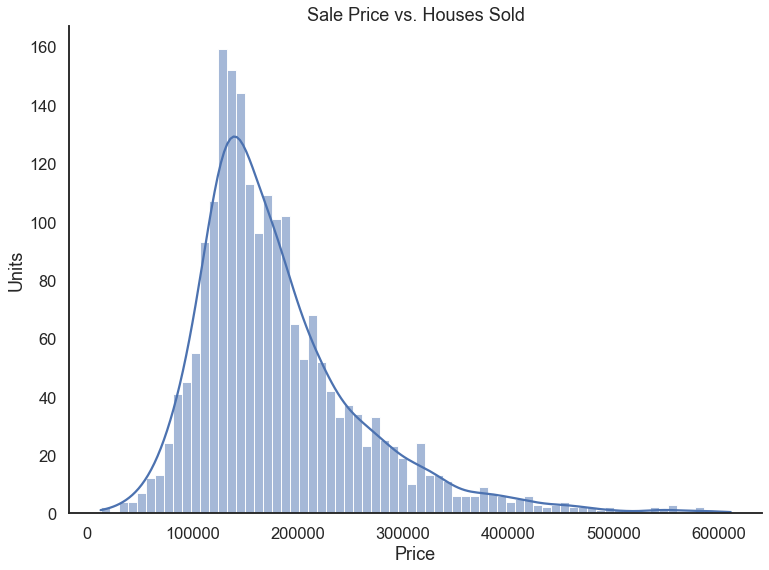

In [31]:
sns.displot(data=train['SalePrice'], bins=70, kde=True, height=8.27, aspect=4/3)
plt.title('Sale Price vs. Houses Sold')
plt.xlabel('Price')
plt.ylabel('Units')
plt.tight_layout()
plt.savefig('../images/eda1.png', transparent=True)

In [32]:
int(train['SalePrice'].mean())

181484

In [33]:
int(train['SalePrice'].max())

611657

In [34]:
int(train['SalePrice'].min())

12789

The average house sold for 181,469, the most expensive house sold for 611,657, and the cheapest sold for 12,789.

Housing Sales by Month

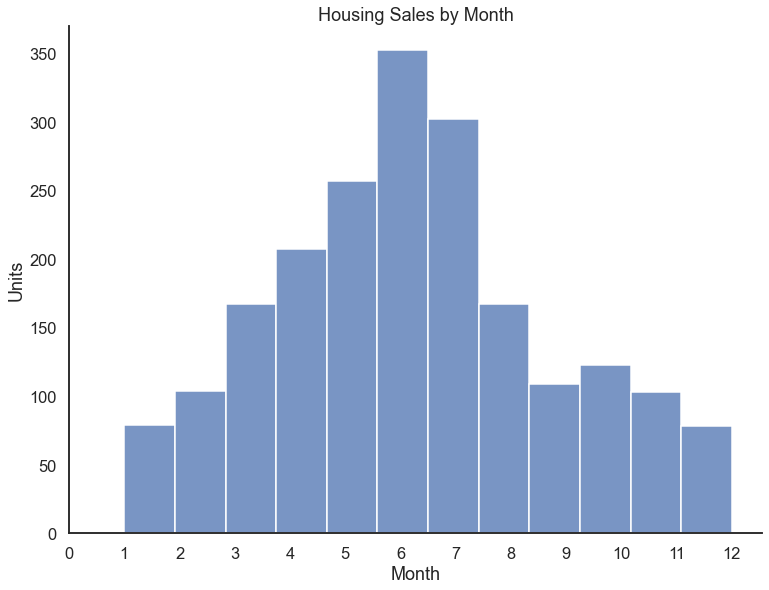

In [35]:
sns.displot(x=train['MoSold'], bins=12, height=8.27, aspect=4/3, kde=False)
plt.xticks(ticks=range(13))
plt.title('Housing Sales by Month')
plt.xlabel('Month')
plt.ylabel('Units')
plt.savefig('../images/eda2.png', transparent=True);

Interestingly, middle of the year looks to be the time where most houses are sold. However, this isin't very useful for this project.

Neighborhood data

<AxesSubplot:ylabel='Neighborhood'>

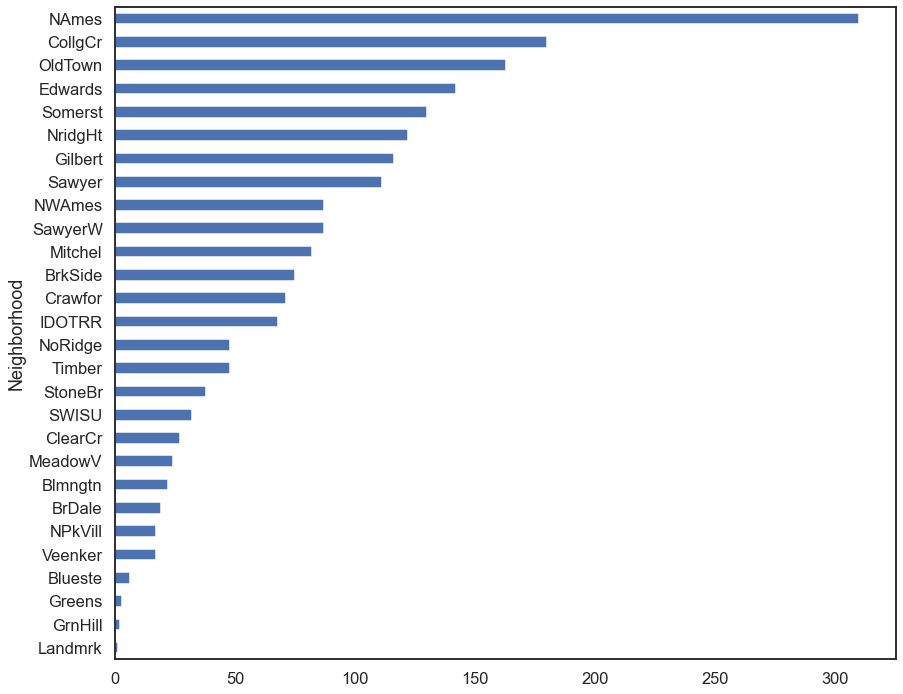

In [36]:
plt.figure(figsize=(14,12))
train.groupby('Neighborhood').Id.count().sort_values(ascending=True).plot(kind='barh')

It's observed that North Ames has the most housing sales.

In [37]:
boxplot = train.groupby('Neighborhood')[['SalePrice']].mean().sort_values(by='SalePrice', ascending=False)

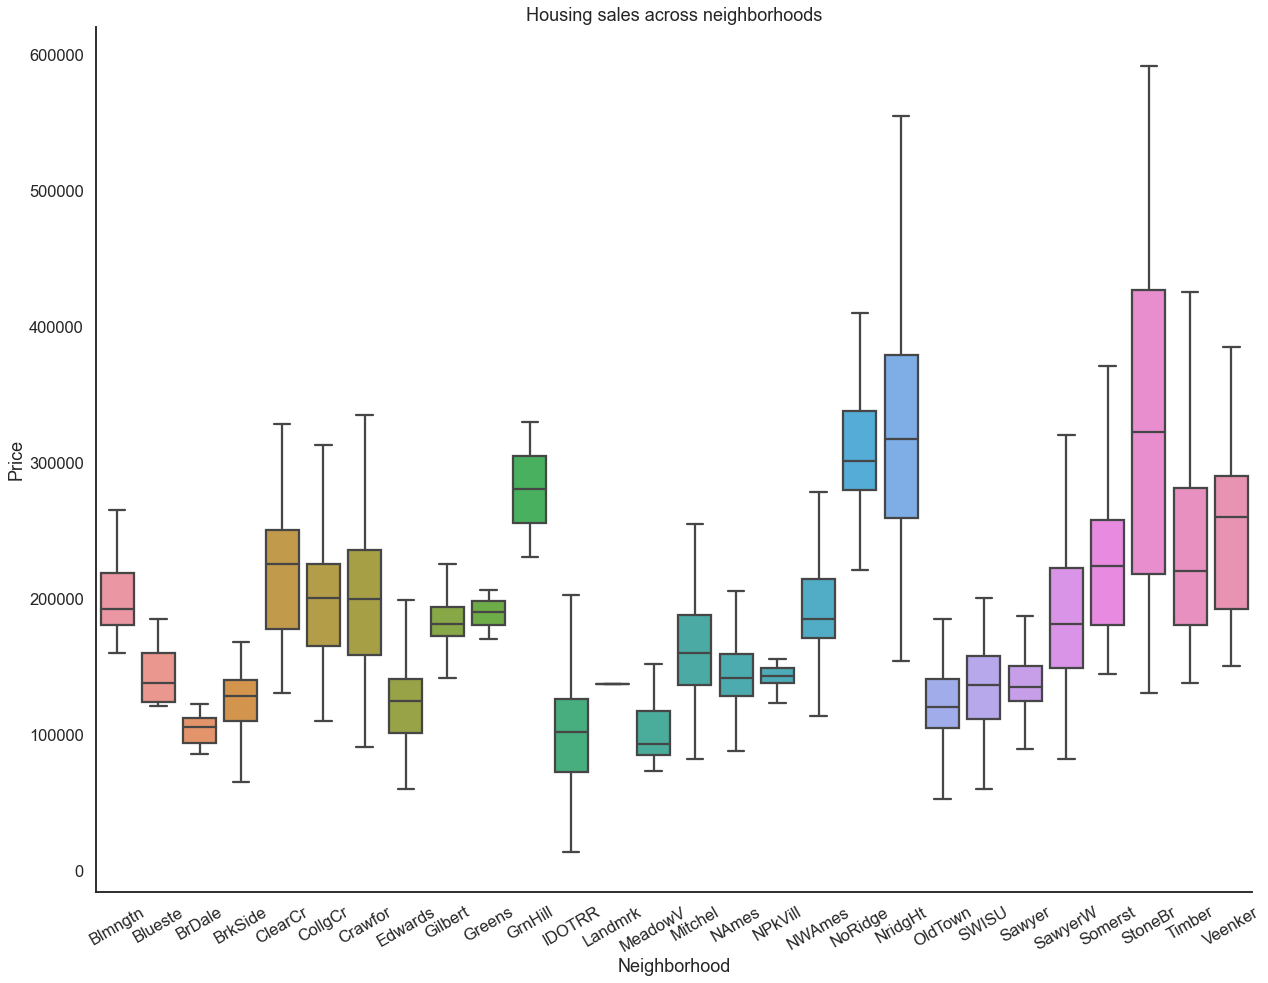

In [38]:
plt.figure(figsize=(18,14))
sns.boxplot(x=train['Neighborhood'].sort_values(ascending=True), y=train['SalePrice'], showfliers=False)
sns.despine()
plt.xticks(rotation=30)
plt.title('Housing sales across neighborhoods')
plt.tight_layout()
plt.ylabel('Price')
plt.savefig('../images/neigh.png', transparent=True);

We can see that neighborhood data provides fairly good indicator of house prices since the spread from a particular neighborhood is seemingly narrow enough. However, considering the number of features I may need to add to the model from this, I decided to omit this out from my model. 

### Deeper dive into numerical features

In [39]:
num_cols = train.select_dtypes(exclude=['object']).columns

In [40]:
def subplot_scatter(dataframe, list_of_columns, y):
    nrows = int(np.ceil(len(list_of_columns)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(14,140))
    ax = ax.ravel()
    for i, col in enumerate(list_of_columns):
        sns.regplot(data=dataframe, x=dataframe[col], y=y, ax=ax[i])
    plt.xticks(rotation=30)
    plt.tight_layout()

In [41]:
# subplot_scatter(train, num_cols, train['SalePrice'])

Above we can see some rather strong relationships with sale price including total number of rooms, age, year of remodel, as well as size of house across various categories. 

### Deeper dive into area related features

In [42]:
area_cols = [
    'MasVnrArea',
    'BsmtFinSF1',
    'TotalBsmtSF',
    '1stFlrSF',
    'GrLivArea',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
]

In [43]:
def subplot_scatter2(dataframe, list_of_columns, y):
    nrows = int(np.ceil(len(list_of_columns)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(14,25))
    ax = ax.ravel()
    for i, col in enumerate(list_of_columns):
        sns.regplot(data=dataframe, x=dataframe[col], y=y, ax=ax[i])
    plt.xticks(rotation=30)
    plt.tight_layout()

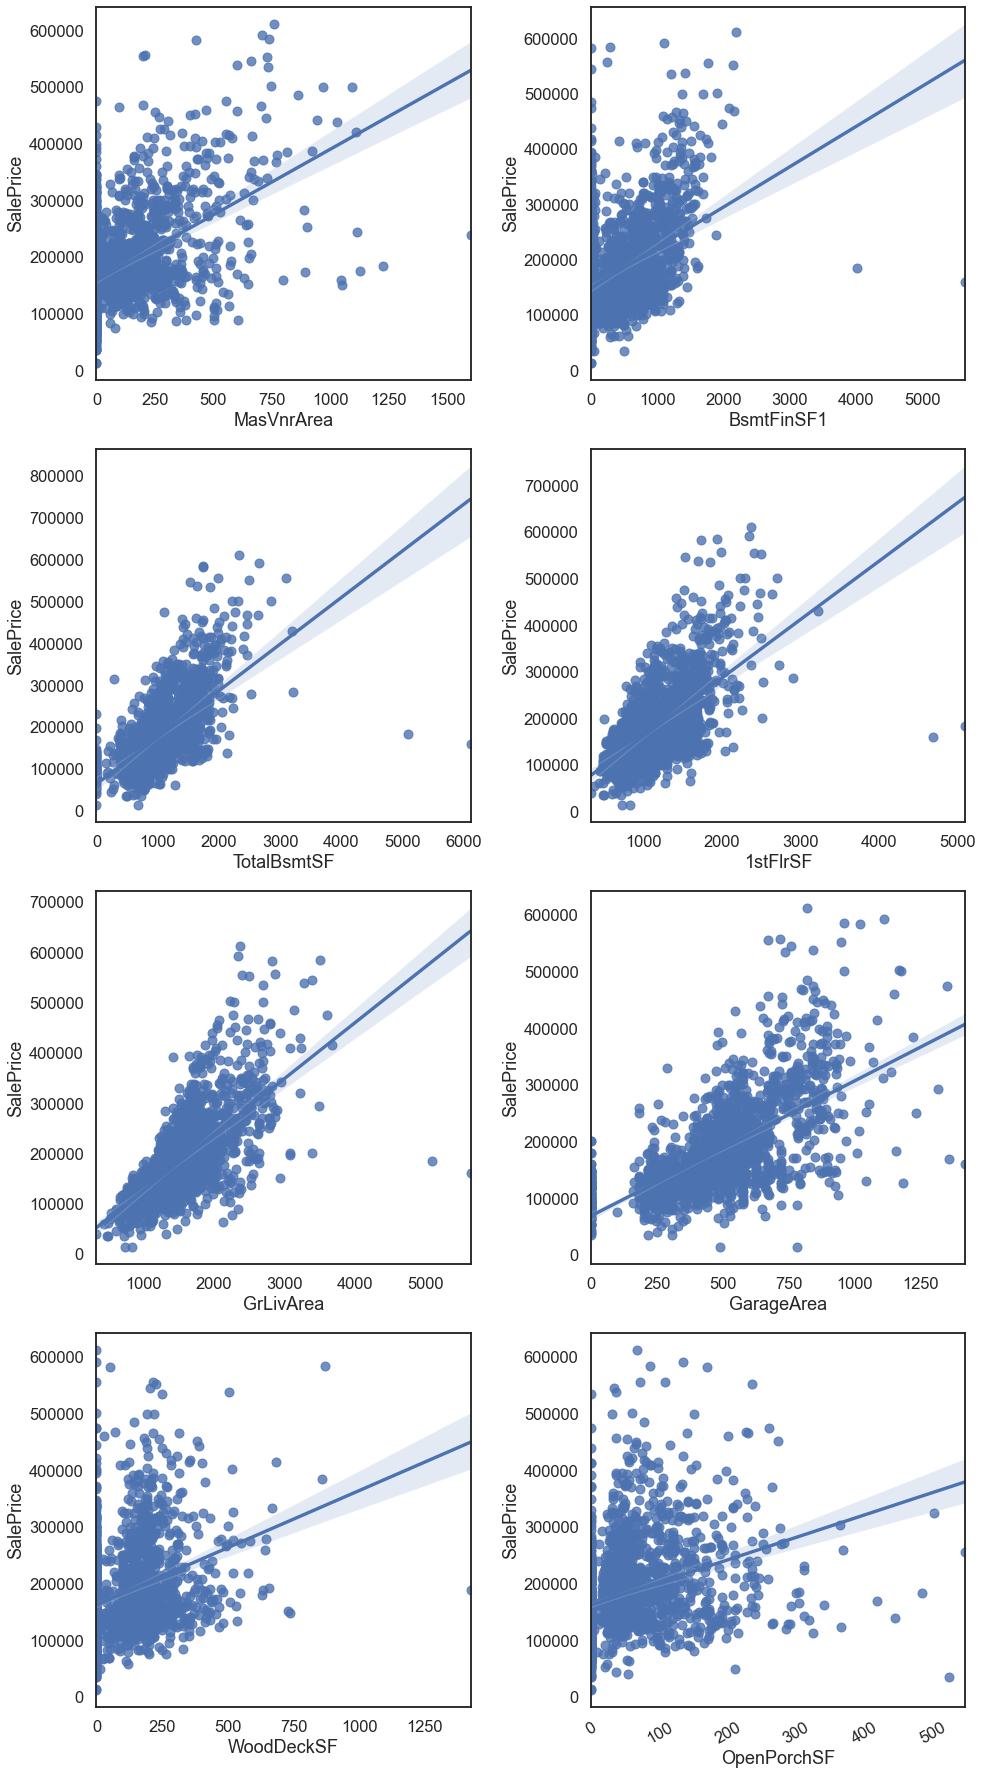

In [44]:
subplot_scatter2(train, area_cols, train['SalePrice'])
plt.savefig('../images/eda3.png', transparent=True)

We can intuitively infer multicollinearity from above findings. We'll attempt to solve this problem in feature engineering section.

### Correlations

Variables with significant correlation with `SalePrice`

In [45]:
corrs = pd.DataFrame(abs(train.corr()['SalePrice']))
corrs.columns = ['Correlation']

<AxesSubplot:>

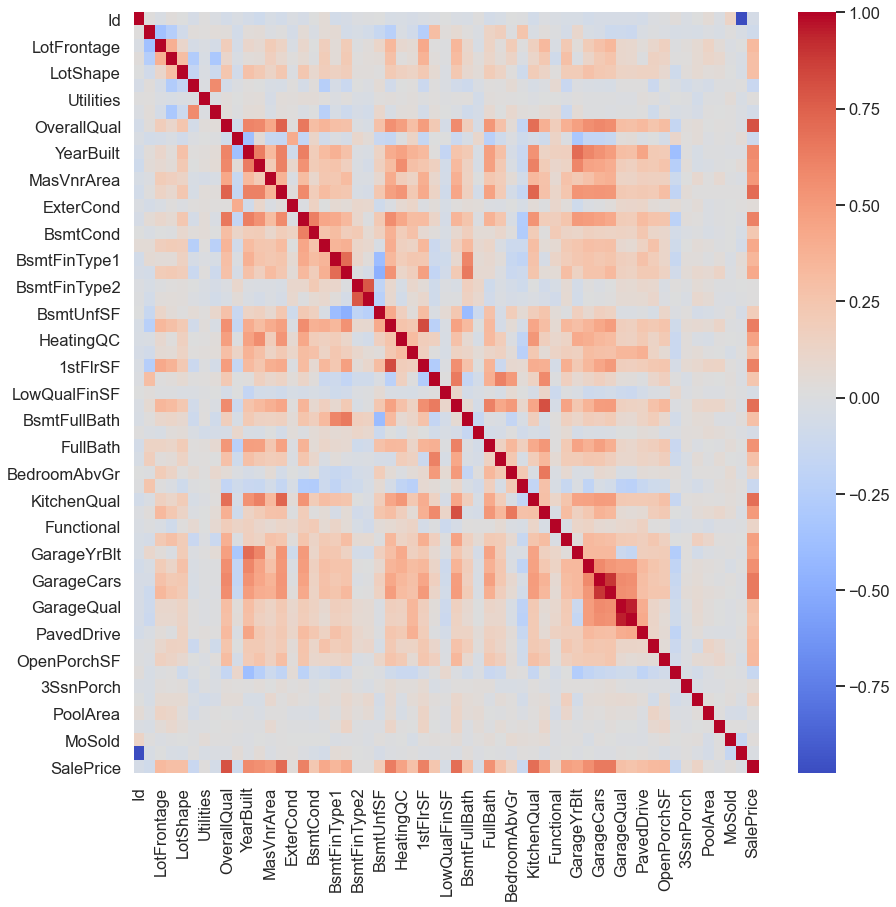

In [46]:
plt.figure(figsize=(14,14))
sns.heatmap(train.corr(), cmap='coolwarm')
#omit annotation due to clutter

In [47]:
df_corr = corrs.sort_values(by='Correlation', ascending=False)[1::]
df_corr = df_corr.drop(['Id'])
df_corr.head(10)

,Correlation
OverallQual,0.800975
ExterQual,0.712880
GrLivArea,0.698046
KitchenQual,0.692190
GarageArea,0.650000
GarageCars,0.648103
TotalBsmtSF,0.631507
1stFlrSF,0.621181
BsmtQual,0.617419
YearBuilt,0.572256


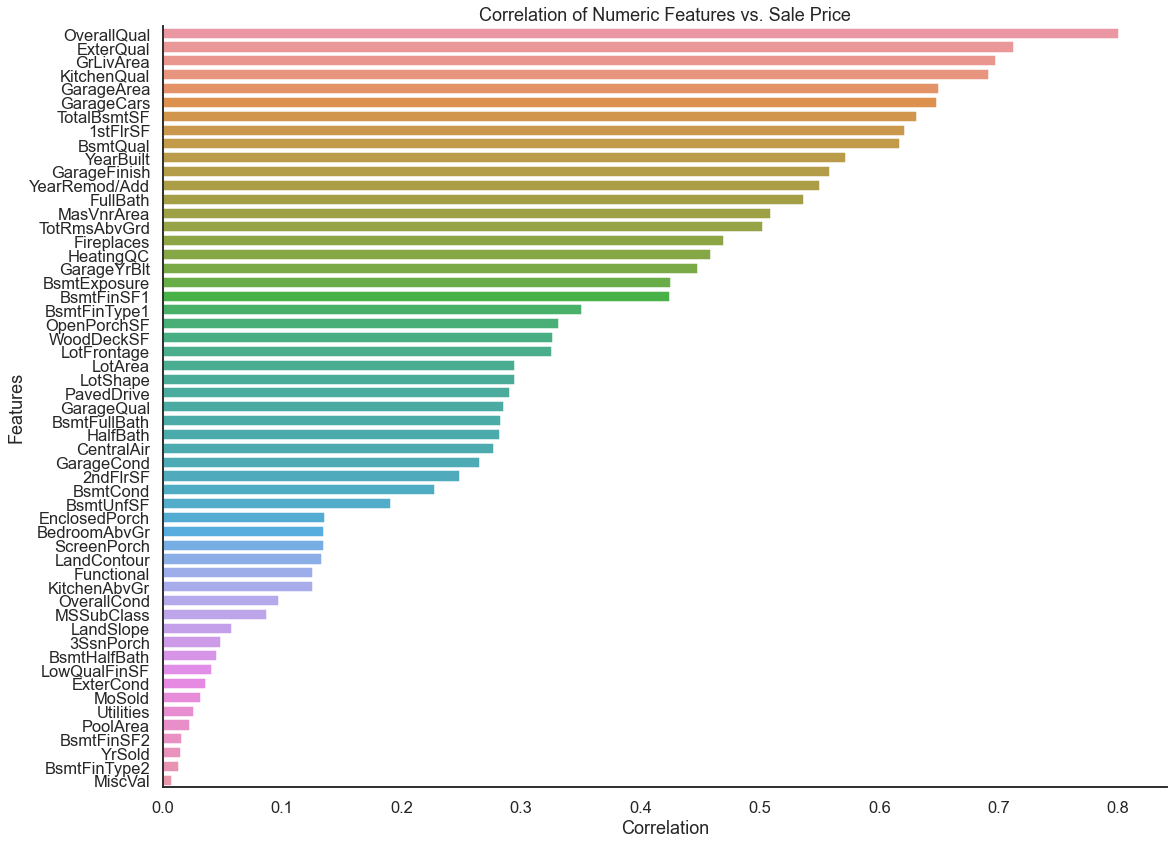

In [48]:
plt.figure(figsize=(18,14))
sns.barplot(y=df_corr.index, x=df_corr['Correlation'])
plt.title('Correlation of Numeric Features vs. Sale Price')
plt.ylabel('Features')
sns.despine()
plt.savefig('../images/eda4.png', transparent=True);

## Feature Engineering

We try to engineer features that can potentially combine features and potentially reduce the number of features to be used in our model.

### Total square feet (interior only)

Experiment combining `GrLivArea` and `TotalBsmtSF` as a heuristic for total square feet (interior).

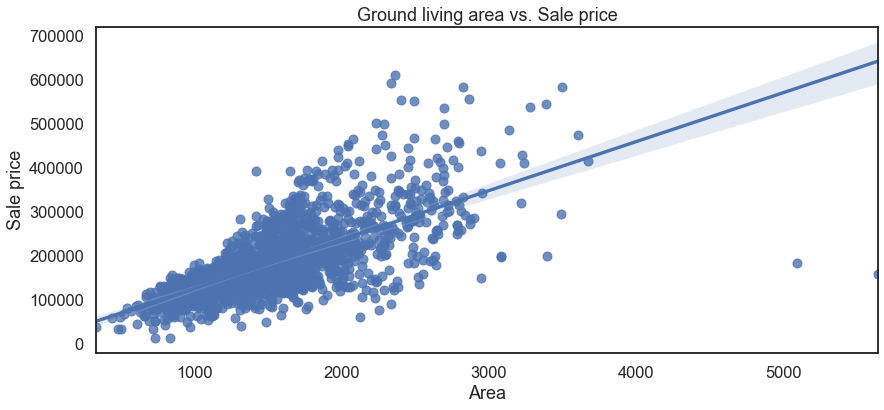

In [49]:
plt.figure(figsize=(14,6))
sns.regplot(x=train['GrLivArea'], y=train['SalePrice'])
plt.title('Ground living area vs. Sale price')
plt.xlabel('Area')
plt.ylabel('Sale price')
plt.savefig('../images/eda6.png', transparent=True);

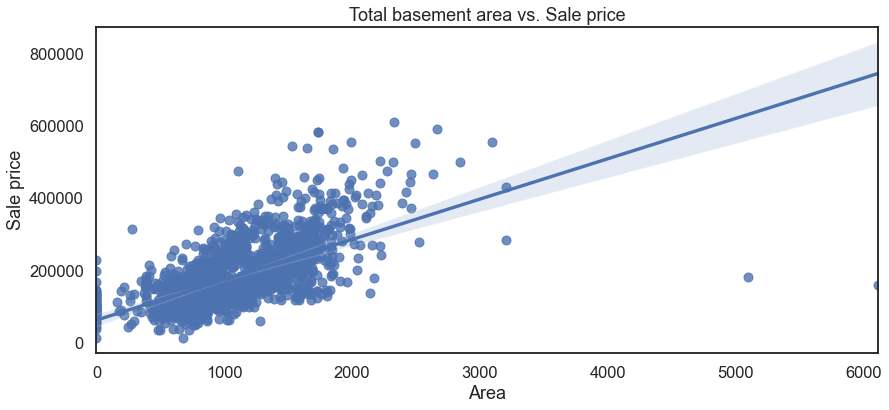

In [50]:
plt.figure(figsize=(14,6))
sns.regplot(x=train['TotalBsmtSF'], y=train['SalePrice'])
plt.title('Total basement area vs. Sale price')
plt.xlabel('Area')
plt.ylabel('Sale price')
plt.savefig('../images/eda7.png', transparent=True);

In [51]:
train['total_sqft'] = train['GrLivArea'] + train['TotalBsmtSF'] 
test['total_sqft'] = test['GrLivArea'] + test['TotalBsmtSF']
X_train['total_sqft'] = X_train['GrLivArea'] + X_train['TotalBsmtSF'] 
X_hold['total_sqft'] = X_hold['GrLivArea'] + X_hold['TotalBsmtSF'] 

<ipython-input-51-f67dbdd889b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['total_sqft'] = X_train['GrLivArea'] + X_train['TotalBsmtSF']
<ipython-input-51-f67dbdd889b5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_hold['total_sqft'] = X_hold['GrLivArea'] + X_hold['TotalBsmtSF']


### Years since remod

Years since remodelling seem to tell a compelling relationship with saleprice, we want to change this to something that we can use to model. In below scenario, we convert to the age since last remodelling by subtracting the current year against `YearRemod/Add`.

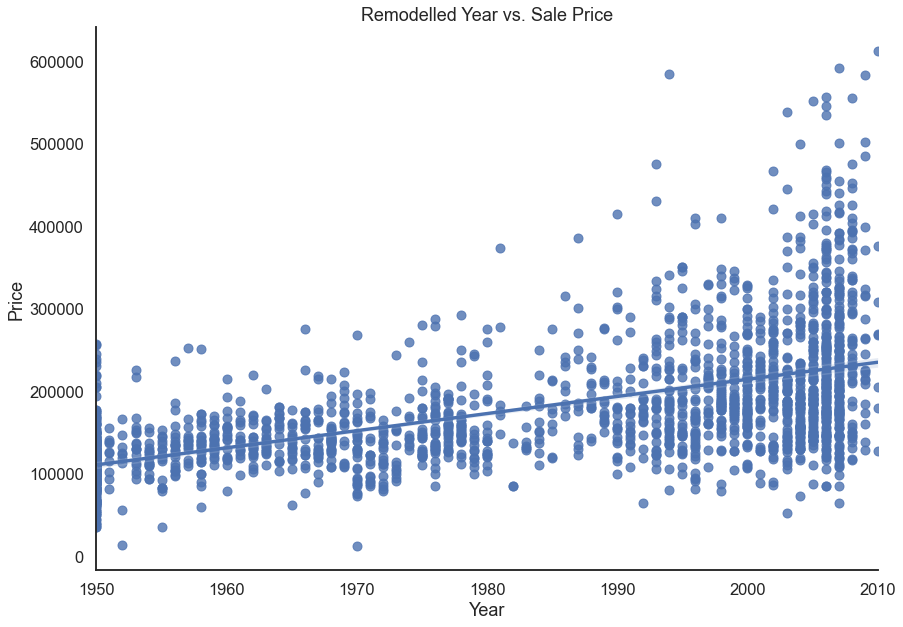

In [52]:
plt.figure(figsize=(14,10))
sns.regplot(x=train['YearRemod/Add'], y=train['SalePrice'])
sns.despine()
plt.title('Remodelled Year vs. Sale Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.savefig('../images/YearSinceRemod.png', transparent=True);

In [53]:
train['YearsSinceRemod'] = 2010 - train['YearRemod/Add']
test['YearsSinceRemod'] = 2010 - test['YearRemod/Add']
X_train['YearsSinceRemod'] = 2010 - X_train['YearRemod/Add']
X_hold['YearsSinceRemod'] = 2010 - X_hold['YearRemod/Add']

<ipython-input-53-7d749fff6ddd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['YearsSinceRemod'] = 2010 - X_train['YearRemod/Add']
<ipython-input-53-7d749fff6ddd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_hold['YearsSinceRemod'] = 2010 - X_hold['YearRemod/Add']


### Age

We can also do something similar for age of the house by subtracting the current year against `YearBuilt`.

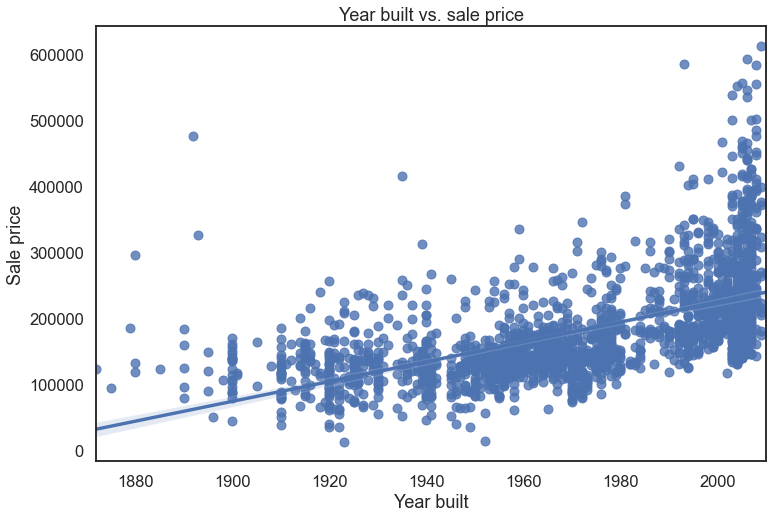

In [54]:
plt.figure(figsize=(12,8))
sns.set_context('talk')
sns.regplot(x=train['YearBuilt'], y=train['SalePrice'])
plt.title('Year built vs. sale price')
plt.xlabel('Year built')
plt.ylabel('Sale price')
plt.savefig('../images/eda5.png', transparent=True);

In [55]:
train['Age'] = 2010 - train['YearBuilt']
test['Age'] = 2010 - test['YearBuilt']
X_train['Age'] = 2010 - X_train['YearBuilt']
X_hold['Age'] = 2010 - X_hold['YearBuilt']

<ipython-input-55-b61e62c84739>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age'] = 2010 - X_train['YearBuilt']
<ipython-input-55-b61e62c84739>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_hold['Age'] = 2010 - X_hold['YearBuilt']


## Save/export datasets

In [56]:
train.to_csv('../datasets/train_clean.csv', index=False)
test.to_csv('../datasets/test_clean.csv', index=False)
X_train.to_csv('../datasets/X_train.csv', index=False)
X_hold.to_csv('../datasets/X_hold.csv', index=False)
y_train.to_csv('../datasets/y_train.csv', index=False)
y_hold.to_csv('../datasets/y_hold.csv', index=False)